In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

### Let the fun begin: Read In Commodity_trade Data

In [ ]:
trade = pd.read_csv("./data/commodity_trade.csv",dtype={'comm_code': str})
trade.shape


In [ ]:
# Replace the values in the 'flow' column
trade['flow'].replace({'Re-Export': 'Export', 'Re-Import': 'Import'}, inplace=True)

In [ ]:
ax = trade['flow'].value_counts().plot(kind ='barh', title="Row Counts for Import and Export")
ax.set_xlabel('Millions(x1,000,000)')
plt.show()

### Some Lite EDA

In [ ]:
# IQR = 1,884,276
trade.head()

#### Begin Analysis and Forecast for Exports

In [ ]:
exports = trade.query('flow =="Export"')
exports.describe()

In [48]:
# Extract the columns of interest
exports = exports[["flow", "trade_usd"]]

# Create a range of dates with yearly frequency from 2000 to 2020
dates = pd.date_range(start="2000-01-01", end="2020-12-31", freq="Y")

# Repeat the dates to match the length of the DataFrame
dates = dates.tolist() * ((len(exports) // len(dates)) + 1)
dates = dates[:len(exports)]

# Format the dates as strings with the format "%Y-%m-%d"
formatted_dates = [date.strftime("%Y-%m-%d") for date in dates]

# Add the years column to the DataFrame
exports["years"] = formatted_dates

# Convert the years column to datetime
exports["years"] = pd.to_datetime(exports["years"])

In [49]:
exports.head()

,flow,trade_usd,years
0,Export,6088,2000-12-31
1,Export,3958,2001-12-31
6,Export,87581,2002-12-31
10,Export,584025,2003-12-31
18,Export,636184,2004-12-31


<Axes: title={'center': 'Row Counts for Exports'}>

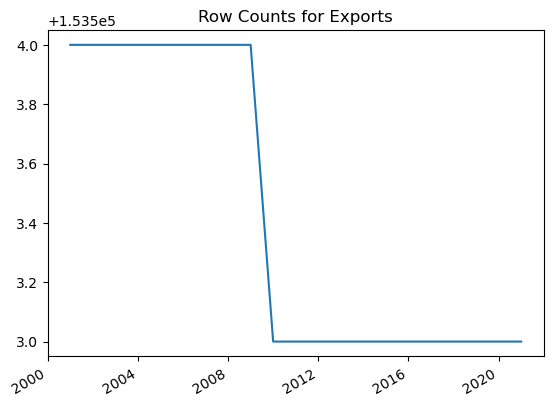

In [58]:
# Print the updated DataFrame
exports['years'].value_counts().plot(kind ='line', title="Row Counts for Exports")

In [51]:
exports.dtypes

flow                 object
trade_usd             int64
years        datetime64[ns]
dtype: object

#### Auto ARIMA Forecast for 5 Years

In [59]:
# Set "years" column as the index
exports.set_index("years", inplace=True)

# Define the number of years to forecast
forecast_period = 5

# Define the model and fit it to the data
model = auto_arima(exports, seasonal=False, suppress_warnings=True)
model.fit(exports)

# Generate the forecasts
forecast = model.predict(n_periods=forecast_period)

# Convert the forecasts to a DataFrame and add a date index
forecast_dates = pd.date_range(start=exports.index[-1], periods=forecast_period+1, freq="Y")[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=["forecast"])

# Concatenate the original data with the forecasts
result = pd.concat([exports, forecast_df], axis=0)



ValueError: could not convert string to float: 'Export'

In [ ]:
# Plot the results
result.plot(figsize=(12,6), title="Imports Forecast for Next 5 Years")

### Begin Analysis and Forecast for Imports

In [52]:
imports = trade.query('flow =="Import"')
# Extract the columns of interest
imports = imports[["flow", "trade_usd"]]
imports.head()

,flow,trade_usd
2,Import,1026804
3,Import,2414533
4,Import,14265937
5,Import,2671732
7,Import,26485


In [53]:
# Create a range of dates with yearly frequency from 2000 to 2020
dates = pd.date_range(start="2000-01-01", end="2020-12-31", freq="Y")

# Repeat the dates to match the length of the DataFrame
dates = dates.tolist() * ((len(imports) // len(dates)) + 1)
dates = dates[:len(imports)]

# Format the dates as strings with the format "%Y-%m-%d"
formatted_dates = [date.strftime("%Y-%m-%d") for date in dates]

# Add the years column to the DataFrame
imports["years"] = formatted_dates

# Convert the years column to datetime
imports["years"] = pd.to_datetime(imports["years"])

In [54]:
imports.head()

,flow,trade_usd,years
2,Import,1026804,2000-12-31
3,Import,2414533,2001-12-31
4,Import,14265937,2002-12-31
5,Import,2671732,2003-12-31
7,Import,26485,2004-12-31


In [55]:
imports.dtypes

flow                 object
trade_usd             int64
years        datetime64[ns]
dtype: object

<Axes: title={'center': 'Row Counts for Imports'}>

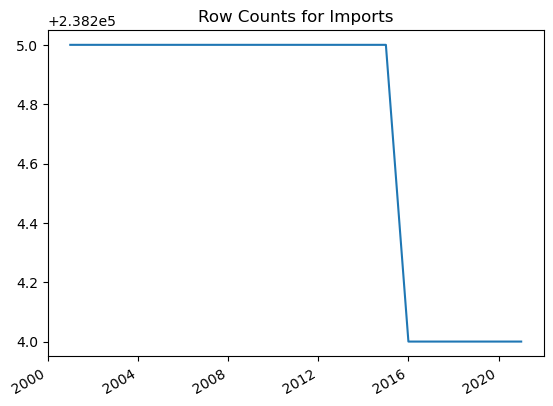

In [56]:
imports['years'].value_counts().plot(kind ='line', title="Row Counts for Imports")